# spe2py

spe2py is a module that imports a Princeton Instruments LightField (SPE 3.x) file into a python environment.

### Basic Usage
##### Modules
The `spe2py` module is designed for quick data loading, viewing, and exploration. It is most effective for quick access
to .spe files via a graphical file dialog, and incorporates tooling functionality to view images and plots with as
little typing as possible.

The `spe_loader` module is responsible for the pure .spe file loading functionality, and can (and should) be imported
separately when only lightweight, programmatic loading is necessary.

##### Loading and accessing data
Use the `load()` function to load one or more SPE files at a time into a set of tools:
```python
>>> import spe2py as spe
>>> spe_tools = spe.load()
```
A file selection window will open to allow browsing for source files. The result is an individual SpeTool object, or, in the case where multiple files are loaded at once, a list of SpeTool objects.

Alternatively programmatic loading should be done with with the `spe_loader` module:
```python
>>> import spe_loader as sl
>>> spe_files = sl.load_from_files(['path/to/file1', 'path/to/file2'])
```
The result is an individual SpeFile object, or, in the case where multiple files are loaded at once, a list of SpeFile objects.

Raw data from a file is stored in NumPy arrays and can be accessed directly by
```python
>>> frame_data = spe_tool.file.data[frame][regionOfInterest]
>>> frame_data = spe_tools[n].file.data[frame][regionOfInterest] # where multiple files are loaded
```
or when using the pure loader module:
```python
>>> frame_data = spe_file.data[frame][regionOfInterest]
>>> frame_data = spe_files[n].data[frame][regionOfInterest] # where multiple files are loaded
```

##### Automatic imaging and plotting (spe2py tools only)
To quickly view an individual frame, region-of-interest, or spectrum, use the `image()` or `specplot()` methods. For example,
```python
>>> spe_tool.image() # images the first frame and region of interest
>>> spe_tool.image(f, r) # images frame 'f' and region of interest 'r'
>>> spe_tool.specplot() # plots the loaded spectrum
```

##### Accessing metadata
Upon loading, the metadata contained in the file's XML footer is automatically parsed and stored as an `untangle` object in the `footer` variable. Elements and attributes can be accessed by calling the different elements and subelements of footer, ending with the attribute as a string:
```python
>>> sensor_height = loaded_file.footer.SpeFormat.Calibrations.SensorInformation['height']
```
One can print the full element tree by calling the `xmltree()` method.

### Dependencies
- NumPy - data storage and file reading
- [untangle](https://github.com/stchris/untangle) - XML parsing
- tkinter - file selection dialog (spe2py tools only)
- matplotlib - imaging and plotting (spe2py tools only)

### Version
2.0.0 - Separation of Tooling and Loading functionality

In [28]:
import matplotlib.pyplot as plt
import math
import spe2py as spe
import spe_loader as sl

In [29]:
testFile = sl.load_from_files(['test.spe'])

Successfully loaded 1 file(s) in a SpeFile object


In [30]:
testData = testFile.data[0][:]

In [44]:
testData

[array([[788, 763, 764, ..., 625, 634, 633]], dtype=uint16)]

In [43]:
testData[0]

array([[788, 763, 764, ..., 625, 634, 633]], dtype=uint16)

In [45]:
testData[0][0]

array([788, 763, 764, ..., 625, 634, 633], dtype=uint16)

In [46]:
testData[0][0][0]

788

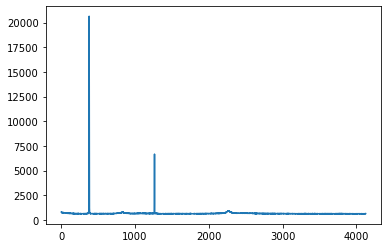

In [48]:
plt.plot(testData[0][0])

In [63]:
aFile = sl.load_from_files(['after.spe'])
bFile = sl.load_from_files(['before.spe'])
aData = aFile.data[0][0][0]
bData = bFile.data[0][0][0]

Successfully loaded 1 file(s) in a SpeFile object
Successfully loaded 1 file(s) in a SpeFile object


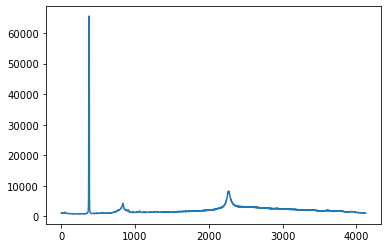

In [64]:
plt.plot(aData)

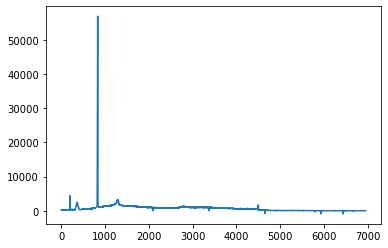

In [66]:
plt.plot(bData)

In [78]:
aFile.data[0][0].shape

(1, 4128)